# AutoKeras (AutoML) demos

Note: Google Colab's CUDA is incompatible to AutoKeras 1.0.16 post1 (which depends on Tensorflow 2.5.x)

## Install AutoKeras

In [1]:
!pip3 install autokeras==1.0.16post1

     |████████████████████████████████| 166 kB 6.6 MB/s 
     |████████████████████████████████| 97 kB 8.8 MB/s 
     |████████████████████████████████| 460.3 MB 7.3 kB/s 
     |████████████████████████████████| 462 kB 56.6 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 14.8 MB 43.1 MB/s 
     |████████████████████████████████| 4.0 MB 47.6 MB/s 
     |████████████████████████████████| 132 kB 82.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=498357fa05d5bf7e8be1ecd5737bbe50cb1be047c34ce1400d4154e06f83065e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found 

## AutoKeras Image Classifier

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
import autokeras as ak

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train)

Trial 1 Complete [00h 39m 53s]
val_loss: 0.040374863892793655

Best val_loss So Far: 0.040374863892793655
Total elapsed time: 00h 39m 53s
INFO:tensorflow:Oracle triggered exit
Epoch 1/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1550 - accuracy: 0.9532
Epoch 2/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0745 - accuracy: 0.9769
Epoch 3/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0601 - accuracy: 0.9810
Epoch 4/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0506 - accuracy: 0.9834
Epoch 5/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0454 - accuracy: 0.9857
Epoch 6/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 7/8
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0363 - accuracy: 0.9880
Epoch 8/8
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0356 - accuracy:

In [3]:
clf.export_model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

In [4]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss：{loss:.4f}')
print(f'Prediction accuracy：{accuracy:.4f}')

313/313 [==============================] - 7s 20ms/step - loss: 0.0363 - accuracy: 0.9897
Prediction loss：0.0363
Prediction accuracy：0.9897


In [5]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 6s 20ms/step


In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



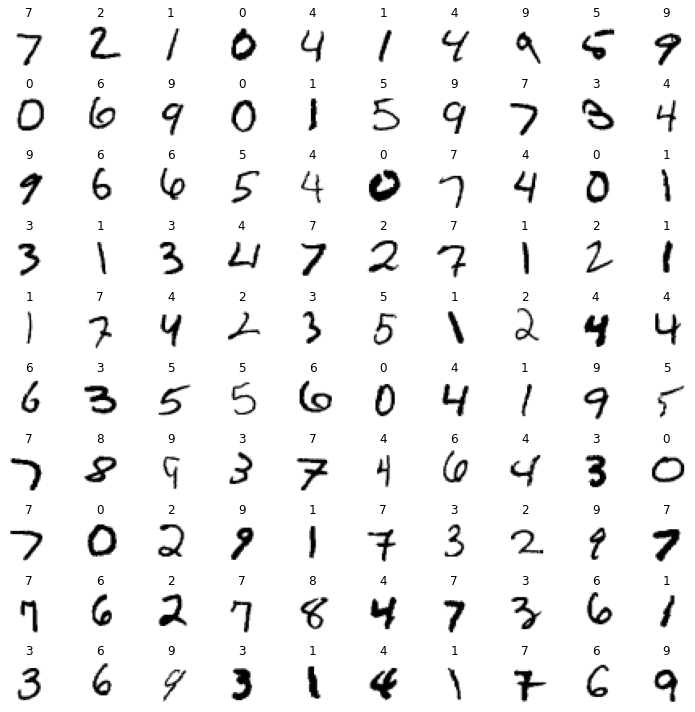

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')
plt.tight_layout()
plt.show()

## AutoKeras Text Classifier

In [8]:
import pandas as pd

df = pd.read_csv('https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/raw/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.v1 = df.v1.map({'ham': 0, 'spam': 1})
labels = ('ham', 'spam')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  df.v2.to_numpy(), df.v1.to_numpy(), test_size=0.2, random_state=42)

In [10]:
import autokeras as ak

clf = ak.TextClassifier(max_trials=2, overwrite=True)
clf.fit(x_train, y_train)

Trial 2 Complete [00h 02m 23s]
val_loss: 0.07869772613048553

Best val_loss So Far: 0.06254071742296219
Total elapsed time: 00h 07m 43s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
140/140 [==============================] - 26s 183ms/step - loss: 0.3375 - accuracy: 0.8791
Epoch 2/2
140/140 [==============================] - 26s 185ms/step - loss: 0.0646 - accuracy: 0.9821
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


In [11]:
clf.export_model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 1)                 0         
_________________________________________________________________
text_vectorization (TextVect (None, 512)               0         
_________________________________________________________________
embedding (Embedding)        (None, 512, 64)           320064    
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 508, 256)          82176     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0     

In [12]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss：{loss:.4f}')
print(f'Prediction accuracy：{accuracy:.4f}')

35/35 [==============================] - 2s 51ms/step - loss: 0.0585 - accuracy: 0.9839
Prediction loss：0.0585
Prediction accuracy：0.9839


In [13]:
predicted = clf.predict(x_test).flatten().astype('uint8')

35/35 [==============================] - 3s 97ms/step


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.93      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
for i in range(10):
  print('Test:', x_test[i])
  print('Predict:', labels[predicted[i]])
  print('Real:', labels[y_test[i]])
  print('')

Test: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
Predict: spam
Real: ham

Test: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones
Predict: ham
Real: ham

Test: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
Predict: spam
Real: spam

Test: Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
Predict: ham
Real: ham

Test: Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
Predict: spam
Real: spam

Test: I'll text carlos and let you know, hang on
Predict: ham
Real: ham

Test: K.i did't see 